In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("titanic.csv")
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [32]:
quartiles = [0.15, 0.50, 0.80]
age_quartiles = df['Age'].quantile(quartiles)
fare_quartiles = df['Fare'].quantile(quartiles)

age_quartiles, fare_quartiles


(0.15    17.0
 0.50    28.0
 0.80    41.0
 Name: Age, dtype: float64,
 0.15     7.7500
 0.50    14.4542
 0.80    39.6875
 Name: Fare, dtype: float64)

In [33]:
min_max_age = df.groupby("Sex")["Age"].agg(["min", "max"])
min_max_age


,min,max
Sex,,
female,0.75,63.0
male,0.42,80.0


In [34]:
mean_age = df.groupby("Sex")["Age"].mean()
mean_age

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [35]:
correlation_age_fare = df[['Age', 'Fare']].corr()
correlation_age_fare

,Age,Fare
Age,1.000000,0.096067
Fare,0.096067,1.000000


In [36]:
correlation_age_others = df.corr(numeric_only=True)["Age"]
correlation_age_others


PassengerId    0.036847
Survived      -0.077221
Pclass        -0.369226
Age            1.000000
SibSp         -0.308247
Parch         -0.189119
Fare           0.096067
Name: Age, dtype: float64

In [37]:
std_var_age = df["Age"].agg(["std", "var"])
std_var_fare = df["Fare"].agg(["std", "var"])
std_var_age, std_var_fare

(std     14.526497
 var    211.019125
 Name: Age, dtype: float64,
 std      49.693429
 var    2469.436846
 Name: Fare, dtype: float64)

In [38]:
df_with_nan = df[df[['Name', 'Sex', 'Age', 'Cabin', 'Embarked']].isnull().any(axis=1)]
print("Data sebelum perubahan:")
print(df_with_nan[['Name', 'Sex', 'Age', 'Cabin', 'Embarked']].head())

df_zero = df.fillna(0)

df_zero_updated = df_zero.loc[df_with_nan.index, ['Name', 'Sex', 'Age', 'Cabin', 'Embarked']]
print("\nData setelah perubahan:")
print(df_zero_updated.head())


Data sebelum perubahan:
                             Name     Sex   Age Cabin Embarked
0         Braund, Mr. Owen Harris    male  22.0   NaN        S
2          Heikkinen, Miss. Laina  female  26.0   NaN        S
4        Allen, Mr. William Henry    male  35.0   NaN        S
5                Moran, Mr. James    male   NaN   NaN        Q
7  Palsson, Master. Gosta Leonard    male   2.0   NaN        S

Data setelah perubahan:
                             Name     Sex   Age Cabin Embarked
0         Braund, Mr. Owen Harris    male  22.0     0        S
2          Heikkinen, Miss. Laina  female  26.0     0        S
4        Allen, Mr. William Henry    male  35.0     0        S
5                Moran, Mr. James    male   0.0     0        Q
7  Palsson, Master. Gosta Leonard    male   2.0     0        S


In [39]:
print("Data sebelum perubahan:")
print(df_with_nan[['Name', 'Sex', 'Age', 'Cabin', 'Embarked']].head())

df_pad = df.fillna(method="pad")

df_pad_updated = df_pad.loc[df_with_nan.index, ['Name', 'Sex', 'Age', 'Cabin', 'Embarked']]
print("\nData setelah perubahan:")
print(df_pad_updated.head())

Data sebelum perubahan:
                             Name     Sex   Age Cabin Embarked
0         Braund, Mr. Owen Harris    male  22.0   NaN        S
2          Heikkinen, Miss. Laina  female  26.0   NaN        S
4        Allen, Mr. William Henry    male  35.0   NaN        S
5                Moran, Mr. James    male   NaN   NaN        Q
7  Palsson, Master. Gosta Leonard    male   2.0   NaN        S

Data setelah perubahan:
                             Name     Sex   Age Cabin Embarked
0         Braund, Mr. Owen Harris    male  22.0   NaN        S
2          Heikkinen, Miss. Laina  female  26.0   C85        S
4        Allen, Mr. William Henry    male  35.0  C123        S
5                Moran, Mr. James    male  35.0  C123        Q
7  Palsson, Master. Gosta Leonard    male   2.0   E46        S


C:\Users\user\AppData\Local\Temp\ipykernel_4512\1263753445.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pad = df.fillna(method="pad")


In [40]:
print("Data sebelum perubahan:")
print(df_with_nan[['Name', 'Sex', 'Age', 'Cabin', 'Embarked']].head())

df_bfill = df.fillna(method="bfill")

df_bfill_updated = df_bfill.loc[df_with_nan.index, ['Name', 'Sex', 'Age', 'Cabin', 'Embarked']]
print("\nData setelah perubahan:")
print(df_bfill_updated.head())

Data sebelum perubahan:
                             Name     Sex   Age Cabin Embarked
0         Braund, Mr. Owen Harris    male  22.0   NaN        S
2          Heikkinen, Miss. Laina  female  26.0   NaN        S
4        Allen, Mr. William Henry    male  35.0   NaN        S
5                Moran, Mr. James    male   NaN   NaN        Q
7  Palsson, Master. Gosta Leonard    male   2.0   NaN        S

Data setelah perubahan:
                             Name     Sex   Age Cabin Embarked
0         Braund, Mr. Owen Harris    male  22.0   C85        S
2          Heikkinen, Miss. Laina  female  26.0  C123        S
4        Allen, Mr. William Henry    male  35.0   E46        S
5                Moran, Mr. James    male  54.0   E46        Q
7  Palsson, Master. Gosta Leonard    male   2.0    G6        S


C:\Users\user\AppData\Local\Temp\ipykernel_4512\498816647.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfill = df.fillna(method="bfill")


In [41]:
print("Data sebelum perubahan:")
print(df.head())

df_dropna = df.dropna()

print("\nData setelah perubahan:")
print(df_dropna.head())

Data sebelum perubahan:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.

In [42]:
print("Data sebelum perubahan:")
print(df_with_nan[['Name', 'Sex', 'Age', 'Cabin', 'Embarked']].head())

df_age_mean = df.copy()
df_age_mean["Age"].fillna(df_age_mean["Age"].mean(), inplace=True)

df_age_updated = df_age_mean.loc[df_with_nan.index, ['Name', 'Sex', 'Age', 'Cabin', 'Embarked']]
print("\nData setelah perubahan:")
print(df_age_updated.head())


Data sebelum perubahan:
                             Name     Sex   Age Cabin Embarked
0         Braund, Mr. Owen Harris    male  22.0   NaN        S
2          Heikkinen, Miss. Laina  female  26.0   NaN        S
4        Allen, Mr. William Henry    male  35.0   NaN        S
5                Moran, Mr. James    male   NaN   NaN        Q
7  Palsson, Master. Gosta Leonard    male   2.0   NaN        S

Data setelah perubahan:
                             Name     Sex        Age Cabin Embarked
0         Braund, Mr. Owen Harris    male  22.000000   NaN        S
2          Heikkinen, Miss. Laina  female  26.000000   NaN        S
4        Allen, Mr. William Henry    male  35.000000   NaN        S
5                Moran, Mr. James    male  29.699118   NaN        Q
7  Palsson, Master. Gosta Leonard    male   2.000000   NaN        S


C:\Users\user\AppData\Local\Temp\ipykernel_4512\3543451637.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_age_mean["Age"].fillna(df_age_mean["Age"].mean(), inplace=True)


In [43]:
df_age_mean.to_excel("titanic_cleaned.xlsx", index=False)

In [44]:
import pandas as pd

df = pd.read_excel("dataset_sarung.xlsx")
df.head()

,Opsi Pengiriman,Waktu Pengiriman Diatur,Waktu Pesanan Dibuat,Metode Pembayaran,Nama Produk,Nama Variasi,Harga Awal,Harga Setelah Diskon,Jumlah,Total Harga Produk,Jumlah Produk di Pesan,Total Pembayaran,Username (Pembeli),Kota/Kabupaten,Provinsi,Waktu Pesanan Selesai
0,Hemat-SPX Hemat,2025-02-04 19:34,2025-02-04 05:27,COD (Bayar di Tempat),Sarung Tenun Dewasa Aljabar Guci,"Jabar Guci Gold,Plastik",34.0,34.0,1,34.000,1,35.840,nirwantyangela,KOTA CIMAHI,JAWA BARAT,2025-02-05 18:55
1,Reguler (Cashless)-SPX Standard,2025-02-04 20:37,2025-02-04 05:08,COD (Bayar di Tempat),Sarung Dewasa Motif Songket Travel Mini Pouch ...,Jbr Guci Gold MP,41.0,41.0,1,41.000,1,43.640,kusmana1972,KAB. GARUT,JAWA BARAT,2025-02-06 10:17
2,Hemat-SPX Hemat,2025-02-04 19:34,2025-02-04 11:19,Online Payment,Sarung Songket Modern Sarung Premium Sarung De...,"Jabar Moza Nw Merah,Dus",34.5,34.5,1,34.500,1,37.000,tia.natiah,KAB. PANDEGLANG,BANTEN,2025-02-06 14:47
3,Hemat-SPX Hemat,2025-02-04 19:34,2025-02-04 07:28,COD (Bayar di Tempat),Sarung Tenun Songket Kemasan Pouch Travel Wate...,Jbr Grey Merah TR-K,39.5,39.5,1,39.500,1,42.080,fitri.raptor,KAB. WONOGIRI,JAWA TENGAH,2025-02-06 17:07
4,Reguler (Cashless)-SPX Standard,2025-02-04 19:34,2025-02-04 02:53,Online Payment,Sarung Anak Laki Laki Usia 4-12 Tahun Al Jabar...,"SA Sabuk Abu,Dus",28.0,28.0,1,28.000,1,27.024,zemo_collection,KAB. TANGERANG,BANTEN,2025-02-06 18:00


In [45]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

df["labelproduk"] = labelencoder.fit_transform(df["Nama Produk"])

In [46]:
df_subset = df[["Nama Produk", "labelproduk"]]
print(df_subset)

                                            Nama Produk  labelproduk
0                      Sarung Tenun Dewasa Aljabar Guci           43
1     Sarung Dewasa Motif Songket Travel Mini Pouch ...           38
2     Sarung Songket Modern Sarung Premium Sarung De...           42
3     Sarung Tenun Songket Kemasan Pouch Travel Wate...           45
4     Sarung Anak Laki Laki Usia 4-12 Tahun Al Jabar...           32
...                                                 ...          ...
3885  [COD] Sarung Dewasa Sarung Motif Songket Simpl...           51
3886  [COD] Sarung Dewasa Sarung Motif Songket Simpl...           51
3887  [COD] Sarung Dewasa Sarung Motif Songket Simpl...           51
3888  [COD] Sarung Dewasa Sarung Motif Songket Simpl...           51
3889  Sarkoci Anak Sarung Koko Peci Anak Usia 1-14 T...           28

[3890 rows x 2 columns]


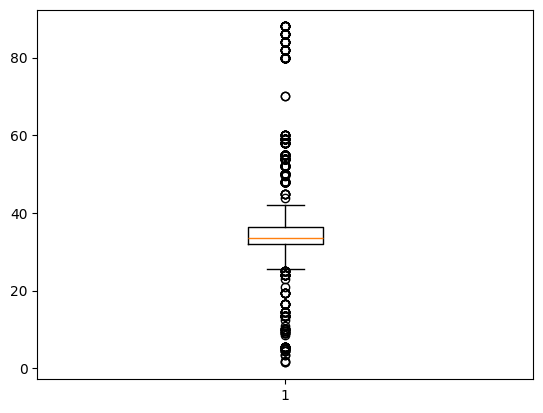

In [47]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots() 
ax.boxplot(df["Harga Setelah Diskon"]) 
plt.show()

In [27]:
df[df.isnull().any(axis=1)]

,Opsi Pengiriman,Waktu Pengiriman Diatur,Waktu Pesanan Dibuat,Metode Pembayaran,Nama Produk,Nama Variasi,Harga Awal,Harga Setelah Diskon,Jumlah,Total Harga Produk,Jumlah Produk di Pesan,Total Pembayaran,Username (Pembeli),Kota/Kabupaten,Provinsi,Waktu Pesanan Selesai,labelproduk
304,Hemat-SPX Hemat,2025-02-06 18:11,2025-02-06 11:22,Online Payment,Sarkoci Anak Sarung Koko Peci Anak Usia 1-14 T...,"Skt New Merah,5-6 Th ( L )",52.0,52.0,1,52.000,1,53.153,NaN,KAB. BEKASI,JAWA BARAT,2025-02-11 05:16,28
622,Hemat-SPX Hemat,2025-02-08 19:03,2025-02-08 08:21,ShopeePay,Tas Sarung Mini Travel Anti air,NaN,10.0,10.0,1,10.000,2,64.400,belidinet,KAB. BANJAR,KALIMANTAN SELATAN,2025-02-13 14:57,49
931,Hemat-SPX Hemat,2025-02-11 19:00,2025-02-10 20:39,SPayLater,Tas Sarung Mini Travel Anti air,NaN,10.0,10.0,1,10.000,8,300.573,pdpc7oei4m,KAB. BANYUMAS,JAWA TENGAH,2025-02-16 03:39,49
1926,Hemat-SPX Hemat,2025-02-22 18:08,2025-02-22 13:33,Online Payment,Tas Sarung Mini Travel Anti air,NaN,10.0,10.0,1,10.000,6,140.305,ypid38fsso,KOTA TANGERANG,BANTEN,2025-02-23 21:25,49
2136,Hemat-SPX Hemat,2025-02-20 18:24,2025-02-20 09:06,Online Payment,[COD] Sarung Dewasa Sarung Motif Songket Simpl...,"Jabar GS Putih,Dus",33.5,33.5,1,33.500,1,35.500,NaN,KAB. JEPARA,JAWA TENGAH,2025-02-25 03:51,51
2255,Reguler (Cashless)-SPX Standard,2025-02-21 17:48,2025-02-21 09:59,Online Payment,Tas Sarung Mini Travel Anti air,NaN,10.0,10.0,1,10.000,2,45.330,viet.indri,KOTA TANGERANG,BANTEN,2025-02-26 03:44,49


In [28]:
df = df.dropna()

In [30]:
df[df.isnull().any(axis=1)]

,Opsi Pengiriman,Waktu Pengiriman Diatur,Waktu Pesanan Dibuat,Metode Pembayaran,Nama Produk,Nama Variasi,Harga Awal,Harga Setelah Diskon,Jumlah,Total Harga Produk,Jumlah Produk di Pesan,Total Pembayaran,Username (Pembeli),Kota/Kabupaten,Provinsi,Waktu Pesanan Selesai,labelproduk
